<img src='../Logo.png' />

# Apprentissage par Régression linéaire avec Python

Un agent immobilier souhaite obtenir de l'aide pour prévoir les prix des maisons dans les régions des États-Unis. Ce serait formidable si vous pouviez en quelque sorte créer un modèle qui peut lui permettre d'intégrer quelques caractéristiques d'une maison et de renvoyer une estimation du prix de la maison.
L’agent immobilier vous a demandé si vous pouviez l'aider avec vos nouvelles compétences en science des données. Vous dites oui et décidez que la régression linéaire pourrait être un bon moyen de résoudre ce problème !
Pour cela, l’argent immobilier vous donne des informations sur un échantillon de 5000 maisons dans des régions des États-Unis. Ces informations se trouvent da la table de données : "Maisons.csv". 

Cette table de données contient les caractéristiques suivantes :
*	'Revenu_moyen' : Le revenu moyen des résidents de la ville où se trouve la maison.
*	'Age_moyen': L’âge moyen des maisons de la ville où se trouve la maison.
*	'Nb_moyen_pieces': Nombre moyen de pièces dans les maisons de la ville où se trouve la maison.
*	'Nb_moyen_chambres' : Nombre moyen de chambres à coucher dans les maisons de la ville où se trouve la maison.
*	'Population' : La population de la ville où se trouve la maison. 
*	'Prix' : Le prix avec lequel la maison s’est vendue
*	'Adresse' : Adresse de la maison.

Objectif : Appliquer la technique d'apprentissage supervisé par régression linéaire pour prédire le prix d'une nouvelle maison dont on dispose de ces caractériques. 

### Importation des librairies
Pour pouvoir mettre en oeuvre l'apprentissage par régression linéaire, nous commencons par l'importation des librairies Python dont on aura besoin.
* pandas : c'est la librairie de référence pour la manipulation des tables de données.
* numpy  : destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
* matplotlib.pyplot : Matplotlib est une librairie destinée à tracer et visualiser des données sous formes de graphiques.
* seaborn : est une librairie de Data Visualization qui vient s'ajouter à Matplotlib en remplacant certains réglages par défaut et fonctions tout en lui ajoutant de nouvelles fonctionnalités.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Etude descriptive de la table de données

In [56]:
# Importation de la table de données

Maisons = pd.read_csv(r"‪C:\Users\HP\OneDrive\Bureau\statis\Maisons.csv")


OSError: [Errno 22] Invalid argument: '\u202aC:\\Users\\HP\\OneDrive\\Bureau\\statis\\Maisons.csv'

In [54]:
# Affichage des cinq premières lignes de la table de données.

Maisons.head()

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population,Prix,Adresse
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [55]:
#Informations relatives aux données de la table

Maisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Revenu_moyen       5000 non-null   float64
 1   Age_moyen          5000 non-null   float64
 2   Nb_moyen_pieces    5000 non-null   float64
 3   Nb_moyen_chambres  5000 non-null   float64
 4   Population         5000 non-null   float64
 5   Prix               5000 non-null   float64
 6   Adresse            5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [32]:
#Statistiques descriptives des variables de la table de données

Maisons.describe()

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population,Prix
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [33]:
# Affichage des noms des variables de la table de données 

Maisons.columns

Index(['Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces', 'Nb_moyen_chambres',
       'Population', 'Prix', 'Adresse'],
      dtype='object')

### Etude de la dépendance linéaire entre les variables de la table  

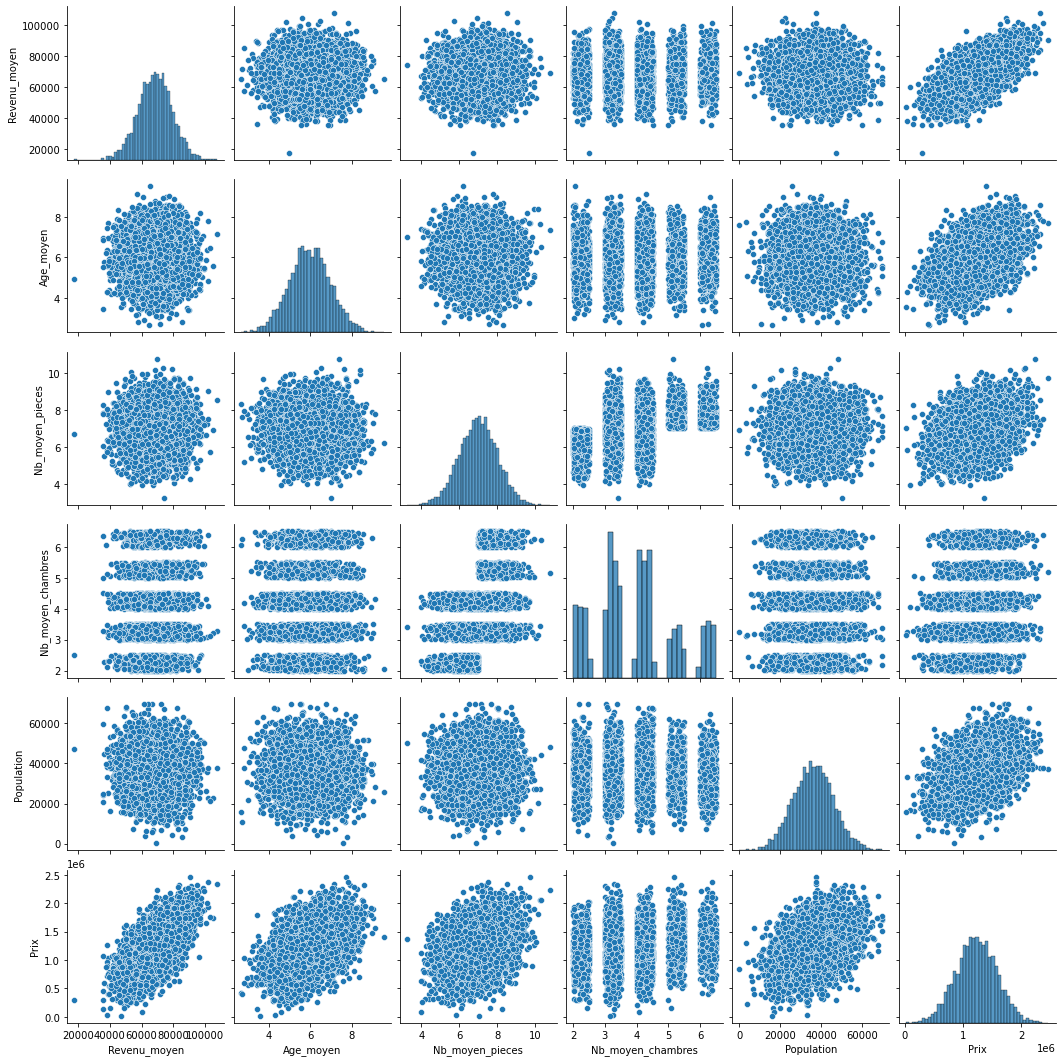

In [34]:
# Graphiques des distributions observées des variables et ceux des nuages de points

sns.pairplot(Maisons)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


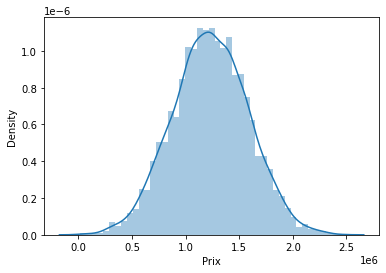

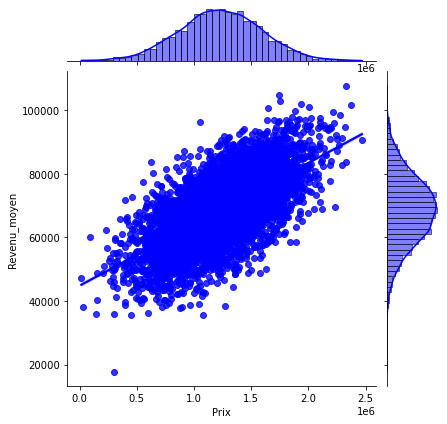

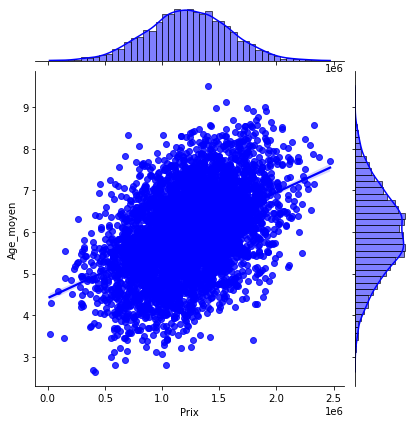

In [35]:
# Graphique de la distribution observée de la variable cible

sns.distplot(Maisons['Prix'])
sns.jointplot(x="Prix",y="Revenu_moyen",data=Maisons,kind="reg",color='b')
sns.jointplot(x="Prix",y="Age_moyen",data=Maisons,kind="reg",color='b')


                   Revenu_moyen  Age_moyen  Nb_moyen_pieces  \
Revenu_moyen           1.000000  -0.002007        -0.011032   
Age_moyen             -0.002007   1.000000        -0.009428   
Nb_moyen_pieces       -0.011032  -0.009428         1.000000   
Nb_moyen_chambres      0.019788   0.006149         0.462695   
Population            -0.016234  -0.018743         0.002040   
Prix                   0.639734   0.452543         0.335664   

                   Nb_moyen_chambres  Population      Prix  
Revenu_moyen                0.019788   -0.016234  0.639734  
Age_moyen                   0.006149   -0.018743  0.452543  
Nb_moyen_pieces             0.462695    0.002040  0.335664  
Nb_moyen_chambres           1.000000   -0.022168  0.171071  
Population                 -0.022168    1.000000  0.408556  
Prix                        0.171071    0.408556  1.000000  


<AxesSubplot:>

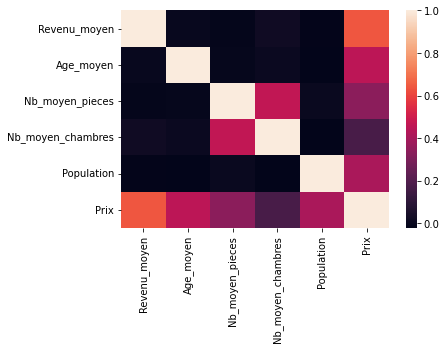

In [36]:
# Calcul des coefficients de correlation
corr_Maisons = Maisons.corr()
print(corr_Maisons)

sns.heatmap(Maisons.corr())

### Mise en oeuvre de la régression linéaire avec statsmodels

In [37]:
#importation du package permettant de réaliser un modèle de régression linéaire
import statsmodels.formula.api as smf

#déclaration du modèle
reg_linear = smf.ols('Prix ~ Revenu_moyen + Age_moyen + Nb_moyen_pieces + Nb_moyen_chambres + Population', data = Maisons)
#lancement des calculs
resultat_reg = reg_linear.fit()
# Affichage des résultats
print(resultat_reg.summary())



                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:02:52   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.637e+06   1.72e+0

In [38]:
# Comme la variable 'Nb_moyen_chambres' n'est pas significative, on va la supprimer du modèle

reg_linear = smf.ols('Prix ~ Revenu_moyen + Age_moyen + Nb_moyen_pieces + Population', data = Maisons)
resultat_reg = reg_linear.fit()
print(resultat_reg.summary())



                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:02:52   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.638e+06   1.72e+04   -1

## Apprentissage par régression linéaire 

Pour ce qui suit, nous allons entraîner notre modèle de régression linéaire. Pour cela, nous devrons d'abord diviser nos données en un tableau X contenant les caractéristiquesaîner et un tableau Y contenant la variable cible qui est dans notre cas la colonne 'Prix'. Nous n'allons pas conserver la colonne 'Adresse' car elle ne contient que des informations textuelles que le modèle de régression linéaire ne peut pas utiliser et la colonne 'Nb_moyen_chambres' car c'est une caractéristique ne contenant pas d'information significative.

### X and Y arrays

In [39]:
X = Maisons[['Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces', 'Population']]
Y = Maisons['Prix']

## Echantillons d'Apprentissage et de Test

On va séparer maintenant les données en un échantillon d'apprentissage (80%) et un échantillon de test (20%). Nous allons entraîner le modèle sur l'échantillon d'apprentissage, puis utiliser l'échantillon de test pour évaluer le modèle.


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

## Elaboration et entrainement du modèle

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(X_train,Y_train)

LinearRegression()

## Evaluation de la qualité du modèle

Évaluons le modèle en vérifiant ses coefficients et comment nous pouvons les interpréter.


In [45]:
# print the intercept
print(lm.intercept_)

-2640826.4419903466


In [46]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Revenu_moyen,21.570435
Age_moyen,165501.853248
Nb_moyen_pieces,121642.083158
Population,15.334530


Interpretation des coefficients:

- En fixant toutes les autres caractéristiques, une augmentation d'une unité de **ùrevenu moyen** engendre une augmentation  **une augmentation de \$21.57 pour le prix**.
- En fixant toutes les autres caractéristiques, une augmentation d'une unité de **Age moyen** engendre une augmentation  **une augmentation de \$165501.85 pour le prix**.
- En fixant toutes les autres caractéristiques, une augmentation d'une unité de **Nombre ùoyen de pièces** engendre une augmentation  **une augmentation de \$121642.08 pour le prix**.
- En fixant toutes les autres caractéristiques, une augmentation d'une unité de **Population** engendre une augmentation  **une augmentation de \$15.33 pour le prix**.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions à partir de notre Modèle

Considérons les prédictions pour notre échantillon de test et évaluons la qualité de ces prédictions.

In [47]:
predictions = lm.predict(X_test)

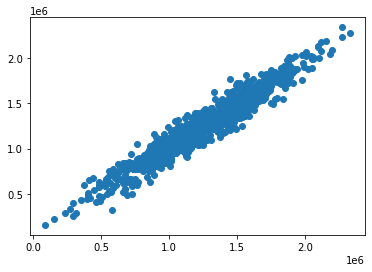

In [48]:
plt.scatter(Y_test,predictions)

**Histogramme des résidus**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


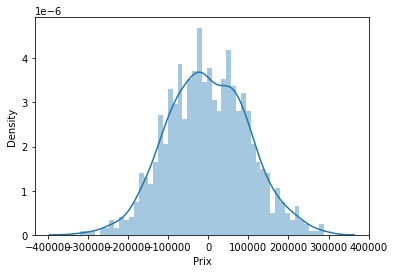

In [49]:
sns.distplot((Y_test-predictions),bins=50);

## Critères d'évaluation pour le modèle de régression


Il existe trois critères d'évaluation pour les problèmes de régression:

**Mean Absolute Error** (MAE) c'est la moyenne de la valeur absolue des erreurs :

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) c'est la moyenne des erreurs au carré :

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) c'est la racine carré de la moyenne des erreurs au carré :

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparaison de ces trois critères :

- **MAE** est le plus simple à comprendre, car c'est l'erreur moyenne.
- **MSE** est plus populaire que MAE car MSE est plus impacté par les erreurs les plus élevés, ce qui a tendance à être utile en pratique.
- **RMSE** est encore plus populaire que MSE, car RMSE est interprétable en le comparant aux valeurs "Y" car il sont de même unités.

Tous ces critères sont des **fonctions de perte** qu'on cherche à minimiser.

In [50]:
from sklearn import metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(Y_test,predictions))
print('MSE:', metrics.mean_squared_error(Y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE: 81251.34759064016
MSE: 10096507277.465406
RMSE: 100481.37776456594


In [52]:
maison_new=np.array([[10000,100,25,20000000]])
PRIX_predict=lm.predict(maison_new)
print(PRIX_predict)

[3.23856711e+08]
